As the dataset is highly imbalanced (492 fraud transactions in approximately 250,000 transactions), we have performed Random Undersampling in which random data from the majority dataset is chosen to match the count of data of the minority class. This might be informative or not. A new Logistic Regression model is trained on the new data set, to analyze and understand the effects of UnderSampling.

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 28 09:00:31 2020

@author: yash
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 25 20:36:32 2020

@author: yash
"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.metrics import average_precision_score, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
#from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

dataset = pd.read_csv('creditcard.csv')

No_of_frauds= len(dataset[dataset["Class"]==1])
normal_index= dataset[dataset["Class"]==0].index
random_normal_indices= np.random.choice(normal_index, No_of_frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)

fraud_index= np.array(dataset[dataset["Class"]==1].index)

undersampled_indices= np.concatenate([fraud_index, random_normal_indices])
undersampled_data= dataset.iloc[undersampled_indices, :]


X = undersampled_data.iloc[:, 0:30].values
Y = undersampled_data.iloc[:, 30].values

X_full = dataset.iloc[:, 0:30].values
Y_full = dataset.iloc[:, 30].values


best_c = 0
max_bal_accuracy = 0

C_values = [0.05, 0.1, 0.25, 0.5]
for c in range(len(C_values)):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state = 42,  stratify = None)
  #X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size = , shuffle=True, random_state = 42,  stratify = None)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  #X_full_test = sc.transform(X_full_test)

  model = LogisticRegression(C = C_values[c])

  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)

  bal_accuracy = balanced_accuracy_score(Y_test, Y_pred)
  
  if bal_accuracy > max_bal_accuracy:
    max_bal_accuracy = bal_accuracy
    best_c = C_values[c]

  

print("The most optimal value of C is: {}".format(best_c))
  


    


#disp = plot_precision_recall_curve(model, X_test, Y_test)

#disp1 = plot_precision_recall_curve(model,X_full_test, Y_full_test)




The most optimal value of C is: 0.1


C is the regularization parameter. Like we have studied in SVM's, the low values of C support better accuracy of the models as it helps with the overfitting problem in a model. Hence, to choose the best value of C, models were trained on different values of C. The value was chosen on the basis of the highest balanced accuracy acheived by that model. 


We will now see the behaviour of the recall scores with different splits in the training and testing data with value of C as 0.25.

In [0]:
import datetime as dt

train_time = []
test_time = []
accuracy = []
precision = []
recall = []
auc = []
balanced = []
f1 = []
splits = []
models = []
roc = []
pr = []
conf_mat = []

# for each split percent
for split in range(10, 51, 10):
    splits.append(split)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split/100, random_state=42, stratify=Y)
    # train
    start1 = dt.datetime.now()
    model = LogisticRegression(max_iter = 500, C = best_c)
    model.fit(X_train, Y_train)
    models.append(model)
    end1 = dt.datetime.now()
    # test
    start2 = dt.datetime.now()
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc.append([tpr, fpr])  # for roc curve
    p, r, _ = precision_recall_curve(Y_test, Y_pred)
    pr.append([p, r])   # for pr curve
    cfm = confusion_matrix(Y_test, Y_pred)
    print(cfm)
    print("----------")
    conf_mat.append(cfm)   # for confusion matrix later
    end2 = dt.datetime.now()
    # score
    train_time.append(end1 - start1)
    test_time.append(end2 - start2)
    accuracy.append(accuracy_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred))
    recall.append(recall_score(Y_test, Y_pred))
    auc.append(roc_auc_score(Y_test, Y_pred))
    balanced.append(balanced_accuracy_score(Y_test, Y_pred))
    f1.append(f1_score(Y_test, Y_pred))

for i in range(len(train_time)):
  print("----------")
  print("Logsitic Regression at {}% split:".format(splits[i]))
  # print("Time taken to train = {}".format(train_time[i]))
  # print("Time taken to test = {}".format(test_time[i]))
  print("Accuracy score = {}".format(accuracy[i]))
  print("Precision score = {}".format(precision[i]))
  print("Recall score = {}".format(recall[i]))
  print("AUC_ROC score = {}".format(auc[i]))
  print("Balanced accuracy score = {}".format(balanced[i]))
  print("F1 score = {}".format(f1[i]))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       0.98      0.90      0.94        49

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99

[[49  1]
 [ 5 44]]
----------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.95      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

[[94  5]
 [ 7 91]]
----------
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg  

The main goal of our model is to detect fradulent transactions. This means, we have to focus more on recall as it will define the ability of the model to correctly classify fradulent transactions.

As we can see from the above results, the recall scores are good. We will create a bar graph to ascertain the best data split for Logistic Regression.

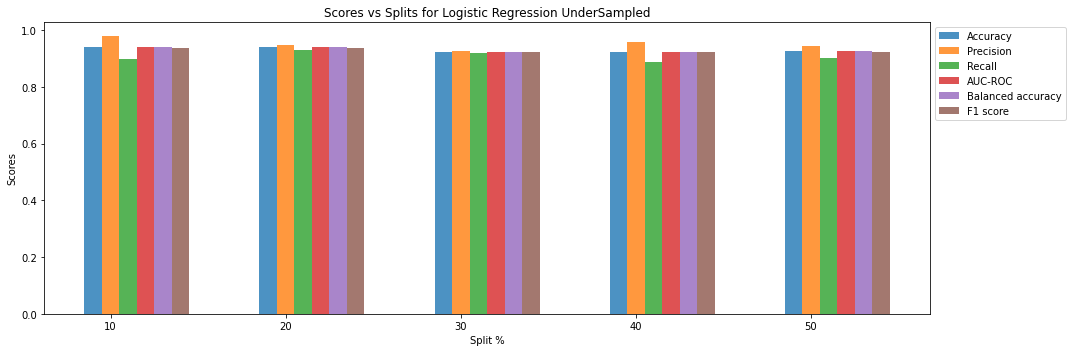

In [0]:
x = np.arange(len(splits))
width = 0.1
opacity = 0.8
# fig, ax = plt.subplots()

# vertical bar graph
plt.figure(figsize=(15, 5))
bar1 = plt.bar(x, accuracy, width, alpha=opacity, label='Accuracy')
bar2 = plt.bar(x+width, precision, width, alpha=opacity, label='Precision')
bar3 = plt.bar(x+(2*width), recall, width, alpha=opacity, label='Recall')
bar4 = plt.bar(x+(3*width), auc, width, alpha=opacity, label='AUC-ROC')
bar5 = plt.bar(x+(4*width), balanced, width, alpha=opacity, label='Balanced accuracy')
bar5 = plt.bar(x+(5*width), f1, width, alpha=opacity, label='F1 score')

plt.xlabel('Split %')
plt.ylabel('Scores')
plt.title('Scores vs Splits for Logistic Regression UnderSampled')
plt.xticks(x+width, splits)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

The Undersampled data shows almost identical results for the data split. However, the 20% split looks to be the most optimum. Hence, we will plot the ROC and PR curves and check the AUCs to understand the strength of the prediction.

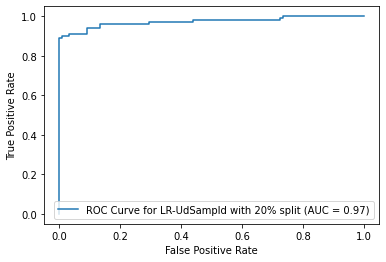

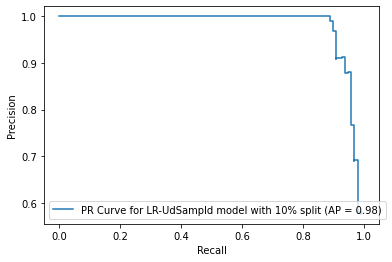

In [0]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state=42, stratify=None)
plot_roc_curve(models[0], X_test, Y_test, name='ROC Curve for LR-UdSampld with 20% split')
plt.show()

# pr curve
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state=42, stratify=None)
# models[0].fit(X_train, Y_train)
plot_precision_recall_curve(models[0], X_test, Y_test, name='PR Curve for LR-UdSampld model with 10% split')
plt.show()

As we can see, the PR Curve shows that the AUC is 0.98 which is a very good result. Hence, now we will test this trained model for the whole data.

In [0]:
splits.append(split)
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.2, shuffle = True, random_state=42, stratify=None)
# train
sc = StandardScaler()
X_full_train = sc.fit_transform(X_full_train)
X__full_test = sc.transform(X_full_test)
Y_full_pred = model.predict(X_full_test)
print(classification_report(Y_full_test, Y_full_pred))
fpr, tpr, _ = roc_curve(Y_full_test, Y_full_pred)
p, r, _ = precision_recall_curve(Y_full_test, Y_full_pred)
cfm = confusion_matrix(Y_full_test, Y_full_pred)
acc = accuracy_score(Y_full_test, Y_full_pred)
prec_score = precision_score(Y_full_test, Y_full_pred)
recall_scr = recall_score(Y_full_test, Y_full_pred)
roc_scr = roc_auc_score(Y_full_test, Y_full_pred)
bal_acry = balanced_accuracy_score(Y_full_test, Y_full_pred)
f1_scry = f1_score(Y_full_test, Y_full_pred)

print("----------")


print("Confusion Matrix for test on whole data:")
print(cfm)
    
print("----------")
print("Logistic Regression scores for test on whole data:")
print("Accuracy score = {}".format(acc))
print("Precision score = {}".format(prec_score))
print("Recall score = {}".format(recall_scr))
print("AUC_ROC score = {}".format(roc_scr))
print("Balanced accuracy score = {}".format(bal_acry))
print("F1 score = {}".format(f1_scry))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.93      0.07        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.98     56962

----------
Confusion Matrix for test on whole data:
[[54272  2592]
 [    7    91]]
----------
Logistic Regression scores for test on whole data:
Accuracy score = 0.9543730908324848
Precision score = 0.033917256802087216
Recall score = 0.9285714285714286
AUC_ROC score = 0.941494493126457
Balanced accuracy score = 0.941494493126457
F1 score = 0.06544408486156059


From the above results, we find that

*   The balanced accuracy scores as well as the recall scores are pretty similar to the test scores for the undersampled data.
*   This means that the model shows promising results for a larger set of data too and is not over fitted.
*   Another key observation is that the precision score for the test on full data is pretty low. But we can overlook this as the model's aim is to classify fraud transactions. 
*   This low score means we will have some legit transactions getting misclassified as fradulent. But this is better than classifying a fradulent transaction as legit.


We will plot the ROC and PR curves for this test.





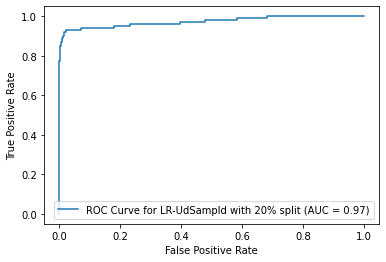

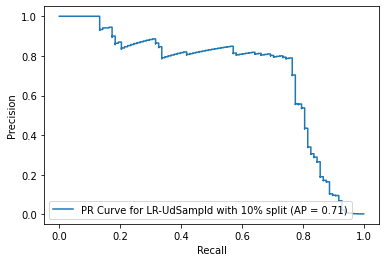

In [0]:
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.2, shuffle = True, random_state=42, stratify=None)
plot_roc_curve(model, X_full_test, Y_full_test, name='ROC Curve for LR-UdSampld with 20% split')
plt.show()

# pr curve
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X_full, Y_full, test_size=0.2, shuffle = True, random_state=42, stratify=None)
# models[0].fit(X_train, Y_train)
plot_precision_recall_curve(model, X_full_test, Y_full_test, name='PR Curve for LR-UdSampld with 10% split')
plt.show()